# Visualize the unemployment rate in the US from 2000 to 2010

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

path = "data/dc28/"

---
<a id='intro'></a>

## Explore the Jobs dataset

In this exercise, you will explore the new jobs DataFrame, which contains the unemployment rate of different industries in the USA during the years of 2000-2010. As you will see, the dataset contains time series for 16 industries and across 122 timepoints (one per month for 10 years). In general, the typical workflow of a Data Science project will involve data cleaning and exploration, so we will begin by reading in the data and checking for missing values.

In [3]:
# Read in jobs file
jobs = pd.read_csv(path+'ch5_employment.csv')

In [4]:
# Print first five lines of your DataFrame
jobs.head(5)

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [5]:

# Check the type of each column in your DataFrame
jobs.dtypes

datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object

In [6]:
# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

In [7]:
# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

In [8]:
# Check the number of missing values in each column
jobs.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

## Describe time series data with boxplots

`You should always explore the distribution of the variables`, and because you are working with time series, you will explore their properties using boxplots and numerical summaries. As a reminder, you can plot data in a DataFrame as boxplots with the command: `df.boxplot(fontsize=6, vert=False)`.

Notice the introduction of the new parameter `vert`, which specifies whether to plot the boxplots horizontally or vertically.

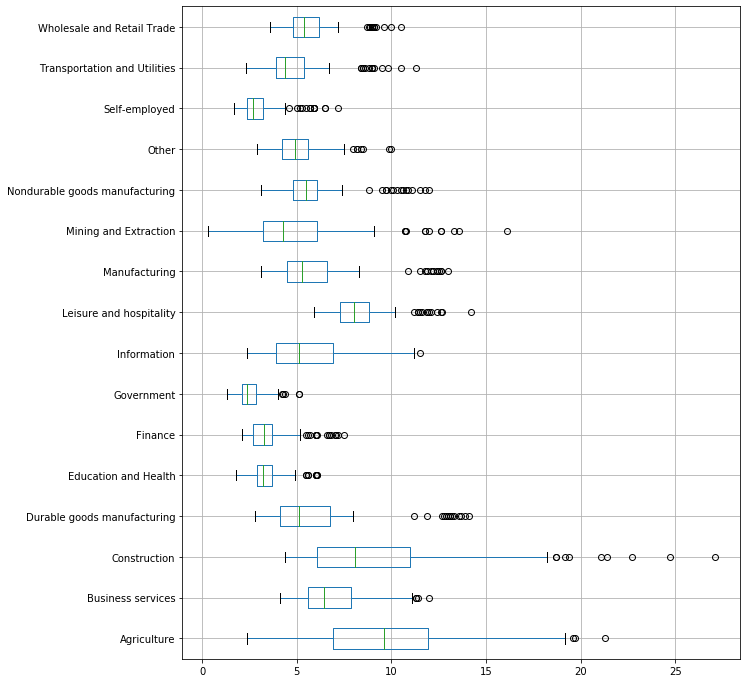

In [11]:
# Generate a boxplot
jobs.boxplot(fontsize=10, vert=False, figsize=(10,12))
plt.show();

In [12]:
# Generate numerical summaries
jobs.describe()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


In [13]:
# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

Agriculture
Construction


## Plot all the time series in your dataset

The jobs DataFrame contains 16 time series representing the unemployment rate of various industries between 2001 and 2010. This may seem like a large amount of time series to visualize at the same time, but you can use `facetted plots`. In this exercise, you will explore some of the time series in the jobs DataFrame and look to extract some meaningful information from these plots.

In [15]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
jobs_subset.head()

,Finance,Information,Manufacturing,Construction
datestamp,,,,
2000-01-01,2.7,3.4,3.6,9.7
2000-02-01,2.8,2.9,3.4,10.6
2000-03-01,2.6,3.6,3.6,8.7
2000-04-01,2.3,2.4,3.7,5.8
2000-05-01,2.2,3.5,3.4,5.0


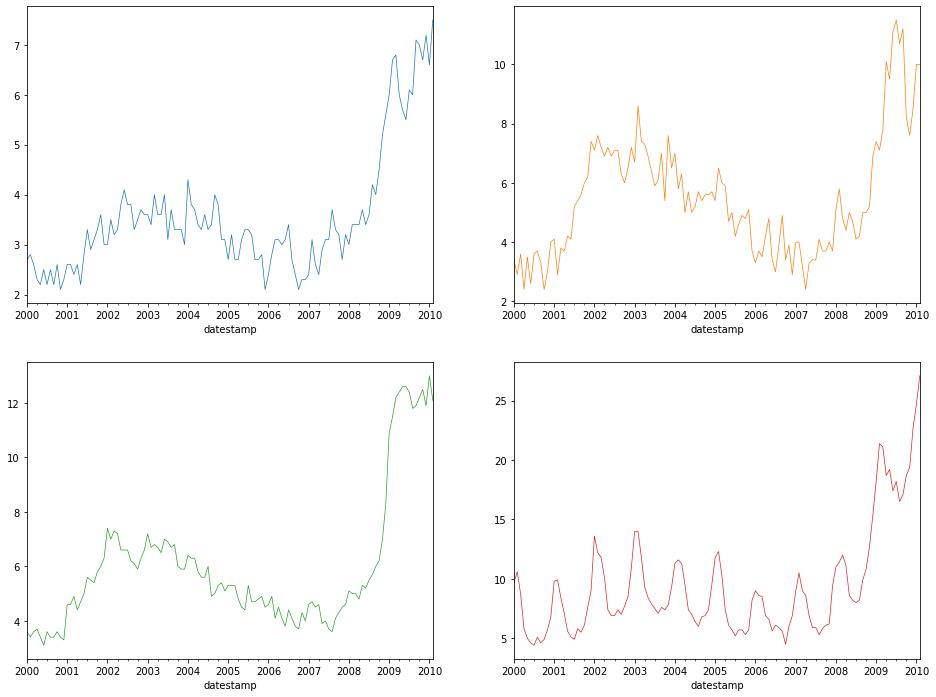

In [19]:
# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2, 2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=10,
                      legend=False,
                     figsize=(16, 12))

plt.show();

The plots really show that there was a drastic increase in unemployment rate during in 2001 and 2008!

## Annotate significant events in time series data

When plotting the Finance, Information, Manufacturing and Construction time series of the jobs DataFrame, you observed a distinct increase in unemployment rates during 2001 and 2008. In general, time series plots can be made even more informative if you include additional annotations that emphasize specific observations or events. This allows you to quickly highlight parts of the graph to viewers, and can help infer what may have caused a specific event.

Recall that you have already set the datestamp column as the index of the jobs DataFrame, so you are prepared to directly annotate your plots with vertical or horizontal lines.

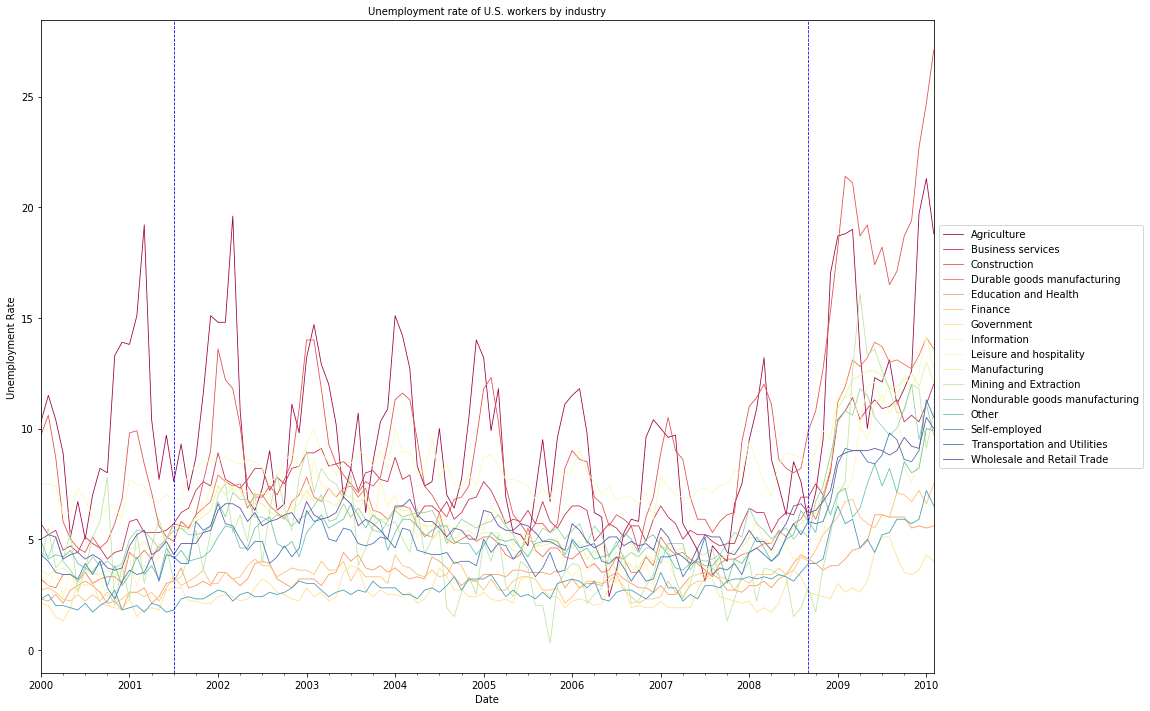

In [22]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=10, linewidth=0.8, figsize=(16, 12))

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show();

## Plot monthly and yearly trends

When the index of a DataFrame is of the datetime type, it is possible to directly extract the day, month or year of each date in the index. As a reminder, you can extract the year of each date in the index using the `.index.year` attribute. You can then use the `.groupby()` and `.mean()` methods to compute the mean annual value of each time series in your DataFrame:
```
index_year = df.index.year
df_by_year = df.groupby(index_year).mean()
```
You will now apply what you have learned to display the aggregate mean values of each time series in the jobs DataFrame.

In [25]:
# Extract the month from the index of jobs
index_month = jobs.index.month
index_month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             5,  6,  7,  8,  9, 10, 11, 12,  1,  2],
           dtype='int64', name='datestamp', length=122)

In [26]:
# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()
jobs_by_month

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
1,13.763636,7.863636,12.909091,6.700000,3.363636,3.572727,2.600000,5.772727,9.345455,6.609091,5.600000,6.481818,5.436364,3.600000,5.790909,6.481818
2,13.645455,7.645455,13.600000,6.563636,3.290909,3.890909,2.327273,5.900000,9.136364,6.500000,5.745455,6.418182,5.618182,3.390909,5.618182,6.372727
3,13.830000,7.130000,11.290000,5.850000,3.110000,3.450000,2.190000,5.360000,8.370000,6.000000,5.140000,6.240000,4.910000,2.880000,5.100000,5.860000
4,9.130000,6.270000,9.450000,5.810000,3.040000,3.280000,2.020000,5.230000,7.700000,5.890000,5.640000,6.060000,4.670000,2.680000,4.790000,5.460000
5,7.100000,6.600000,8.120000,5.690000,3.290000,3.350000,2.200000,5.480000,7.930000,5.720000,5.280000,5.790000,4.810000,2.770000,4.500000,5.490000
6,6.770000,6.720000,7.430000,5.830000,3.820000,3.540000,3.100000,5.260000,8.420000,5.730000,5.570000,5.590000,5.160000,2.600000,4.820000,5.840000
7,7.010000,6.740000,7.350000,6.250000,3.870000,3.520000,3.490000,5.320000,7.950000,6.000000,4.950000,5.570000,5.110000,2.770000,5.040000,5.750000
8,8.080000,6.570000,7.300000,5.780000,3.890000,3.610000,3.360000,5.550000,7.920000,5.660000,4.500000,5.490000,5.410000,2.890000,4.580000,5.610000
9,7.090000,6.790000,7.560000,5.820000,3.540000,3.540000,2.610000,5.730000,7.930000,5.720000,4.480000,5.570000,5.020000,3.070000,4.650000,5.630000


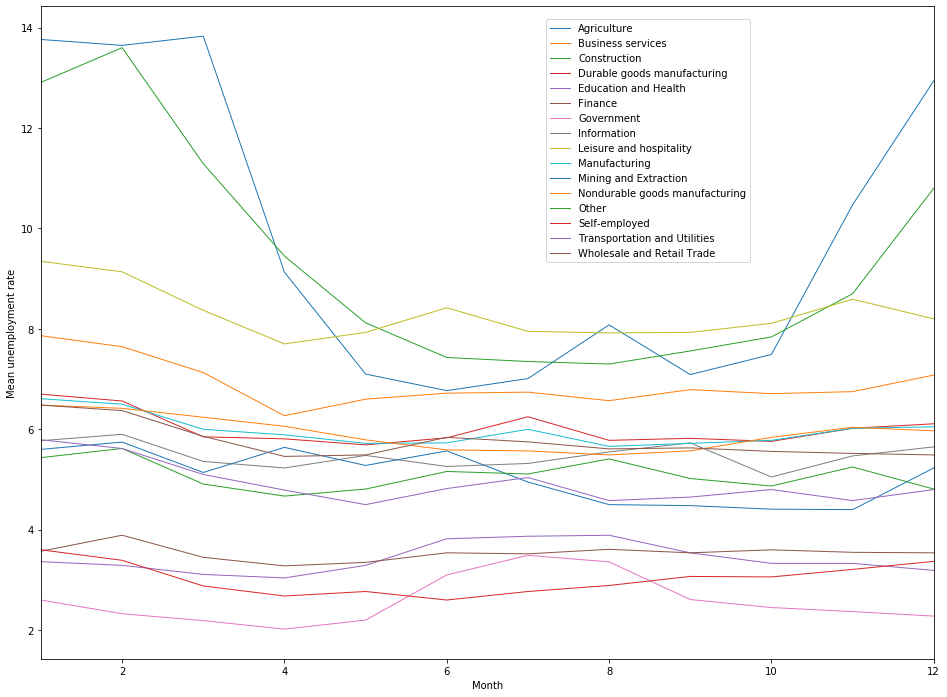

In [27]:
# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=10, linewidth=1, figsize=(16, 12))

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show();

In [28]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year
index_year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010],
           dtype='int64', name='datestamp', length=122)

In [29]:
# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()
jobs_by_year

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000,9.025000,4.783333,6.325000,3.175000,2.450000,2.416667,2.141667,3.200000,6.633333,3.458333,4.433333,3.975000,3.891667,2.083333,3.441667,4.300000
2001,11.283333,6.125000,7.066667,5.233333,2.833333,2.866667,2.183333,4.883333,7.500000,5.233333,4.233333,5.216667,4.000000,2.083333,4.241667,4.866667
2002,10.266667,7.875000,9.200000,6.925000,3.358333,3.550000,2.533333,6.925000,8.375000,6.650000,6.300000,6.233333,5.100000,2.583333,4.900000,6.100000
2003,10.391667,8.241667,9.341667,6.908333,3.625000,3.491667,2.808333,6.816667,8.741667,6.591667,6.641667,6.058333,5.733333,2.741667,5.266667,6.000000
2004,10.075000,6.833333,8.425000,5.525000,3.433333,3.566667,2.658333,5.666667,8.316667,5.641667,4.008333,5.841667,5.266667,2.791667,4.425000,5.750000
2005,8.416667,6.233333,7.450000,4.608333,3.416667,2.875000,2.550000,5.066667,7.758333,4.875000,3.150000,5.341667,4.800000,2.733333,4.158333,5.375000
2006,7.358333,5.650000,6.683333,3.875000,3.008333,2.725000,2.283333,3.741667,7.283333,4.191667,3.150000,4.808333,4.675000,2.675000,3.991667,4.933333
2007,6.233333,5.325000,7.375000,4.141667,2.966667,2.975000,2.333333,3.575000,7.366667,4.258333,3.425000,4.466667,3.916667,2.850000,3.916667,4.716667
2008,9.266667,6.558333,10.600000,5.658333,3.491667,3.950000,2.441667,5.016667,8.641667,5.758333,3.083333,5.975000,5.266667,3.641667,5.133333,5.841667


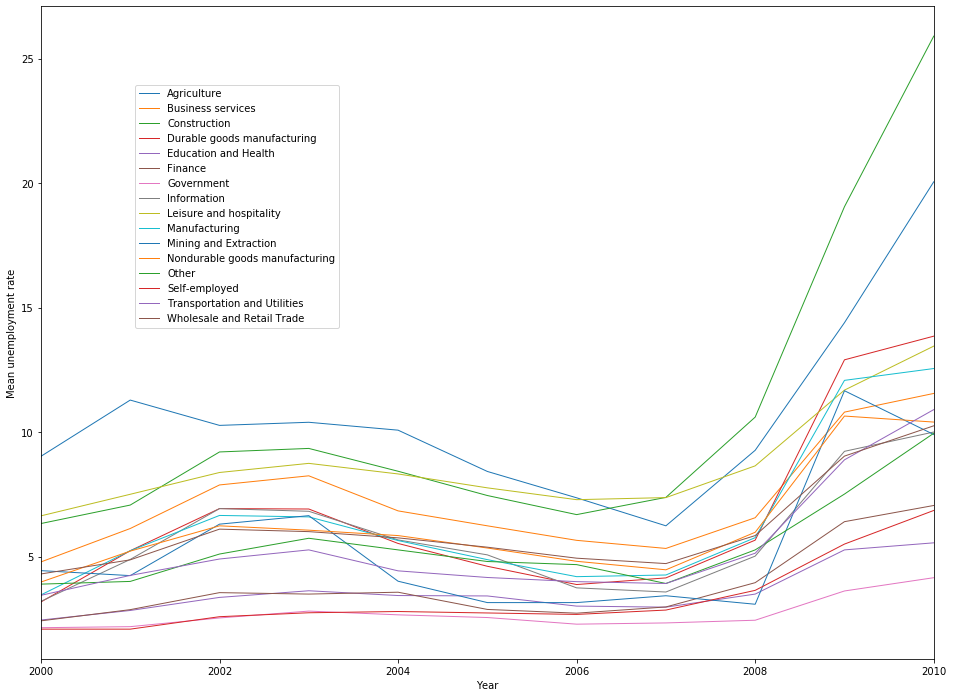

In [31]:
# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=10, linewidth=1, figsize=(16, 12))

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

Averaging time series values by month shows that unemployment rate tends to be a lot higher during the winter months for the Agriculture and Construction industry. The increase in unemployment rate after 2008 is very clear when average time series values by year.

## Apply time series decomposition to your dataset

You will now perform `time series decomposition on multiple time series`. You can achieve this by leveraging the Python dictionary to store the results of each time series decomposition.

In this exercise, you will initialize an empty dictionary with a set of curly braces, `{}`, use a for loop to iterate through the columns of the DataFrame and apply time series decomposition to each time series. After each time series decomposition, you place the results in the dictionary by using the command `my_dict[key] = value`, where `my_dict` is your dictionary, `key` is the name of the column/time series, and `value` is the decomposition object of that time series.

In [32]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

In [35]:
# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

In [36]:
jobs_decomp

{'Agriculture': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a17209630>,
 'Business services': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a171ef208>,
 'Construction': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a171ef2e8>,
 'Durable goods manufacturing': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a171ef470>,
 'Education and Health': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a171ef6a0>,
 'Finance': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a171ef8d0>,
 'Government': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a171efb38>,
 'Information': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a171efda0>,
 'Leisure and hospitality': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a1720c080>,
 'Manufacturing': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a1720c2b0>,
 'Mining and Extraction': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a1720c518>,
 'Nondurable goods manufacturing': <statsmodels.tsa.seasonal.DecomposeResult at 0x1a1720c780>,
 'Other': <statsmo

## Visualize the seasonality of multiple time series

You will now extract the seasonality component of jobs_decomp to visualize the seasonality in these time series. Note that before plotting, you will have to convert the dictionary of seasonality components into a DataFrame using the `pd.DataFrame.from_dict()` function.

An empty dictionary jobs_seasonal and the time series decompositon object jobs_decomp from the previous exercise are available in your workspace.

In [38]:
jobs_seasonal = {}

In [40]:
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
#jobs_seasonal

In [41]:
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)
seasonality_df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,3.748816,0.981096,3.184209,0.567948,-0.060934,-0.024861,-0.040779,0.195768,0.905135,0.527751,0.626319,0.460610,0.094796,0.470752,0.652473,0.630714
2000-02-01,3.687704,0.614429,3.545320,0.396651,-0.178063,0.218657,-0.349113,0.337897,0.768098,0.437010,0.375856,0.505517,0.378129,0.239734,0.511269,0.487195
2000-03-01,4.546038,0.443596,2.579117,0.304522,-0.185934,0.113102,-0.279205,0.046694,0.270413,0.403214,0.399931,0.518017,0.008684,0.038345,0.478399,0.288121
2000-04-01,-0.540536,-0.471682,0.735135,0.103133,-0.253063,-0.085509,-0.462539,-0.027843,-0.382365,0.190714,0.874468,0.379591,-0.287149,-0.219063,0.092751,-0.095212
2000-05-01,-2.388221,-0.184645,-0.781069,-0.118164,-0.075285,-0.038287,-0.343094,0.079564,-0.190235,-0.046786,0.280949,0.053665,-0.210297,-0.138970,-0.285027,-0.137342


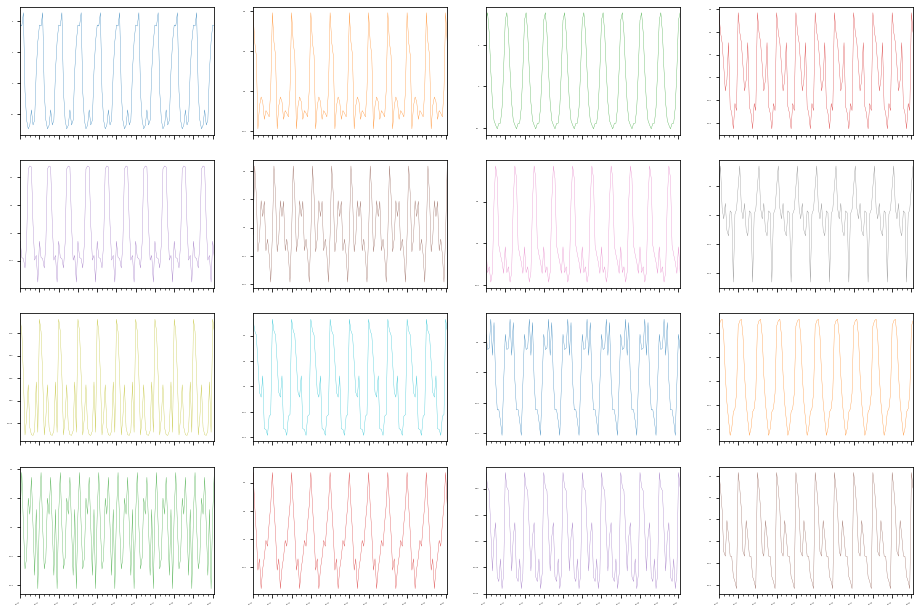

In [43]:
# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4, 4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False,
                   figsize=(16, 12))

# Show plot
plt.show();

Each time series in the jobs DataFrame have very different seasonality patterns!

## Correlations between multiple time series

In the previous exercise, you extracted the seasonal component of each time series in the jobs DataFrame and stored those results in new DataFrame called `seasonality_df`. In the context of jobs data, it can be interesting to compare seasonality behavior, as this may help `uncover which job industries are the most similar or the most different`.

This can be achieved by using the `seasonality_df` DataFrame and computing the correlation between each time series in the dataset. In this exercise, you will compute and create a `clustermap visualization` of the correlations between time series in the `seasonality_df` DataFrame.

In [44]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')
seasonality_corr

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
Agriculture,1.000000,0.457494,0.801345,0.422888,-0.520043,0.091002,-0.555247,0.726810,0.530697,0.577282,0.184144,0.731602,0.014105,0.759925,0.397600,0.304431
Business services,0.457494,1.000000,0.665053,0.594052,-0.012142,0.473658,-0.058127,0.605159,0.727150,0.647291,0.405086,0.615008,0.180610,0.559080,0.673911,0.594052
Construction,0.801345,0.665053,1.000000,0.571884,-0.581474,0.149372,-0.710113,0.713840,0.645088,0.751566,0.526598,0.943300,-0.026616,0.595409,0.605159,0.445442
Durable goods manufacturing,0.422888,0.594052,0.571884,1.000000,0.176857,0.562168,-0.044817,0.452096,0.700530,0.953416,0.691912,0.653606,0.428838,0.135830,0.846938,0.880212
Education and Health,-0.520043,-0.012142,-0.581474,0.176857,1.000000,0.406111,0.888797,-0.131604,0.027122,-0.068043,-0.068409,-0.525041,0.619434,-0.339928,-0.055399,0.292652
Finance,0.091002,0.473658,0.149372,0.562168,0.406111,1.000000,0.312810,0.304431,0.513588,0.460349,0.375998,0.299107,0.630887,-0.113735,0.601432,0.790431
Government,-0.555247,-0.058127,-0.710113,-0.044817,0.888797,0.312810,1.000000,-0.389348,-0.051472,-0.295707,-0.252749,-0.662863,0.439552,-0.284094,-0.106708,0.146178
Information,0.726810,0.605159,0.713840,0.452096,-0.131604,0.304431,-0.389348,1.000000,0.511990,0.585194,0.251751,0.622535,0.261540,0.641328,0.338963,0.412167
Leisure and hospitality,0.530697,0.727150,0.645088,0.700530,0.027122,0.513588,-0.051472,0.511990,1.000000,0.667256,0.293284,0.654937,0.438154,0.455930,0.614017,0.620671
Manufacturing,0.577282,0.647291,0.751566,0.953416,-0.068043,0.460349,-0.295707,0.585194,0.667256,1.000000,0.765781,0.821310,0.227195,0.236984,0.860247,0.820318


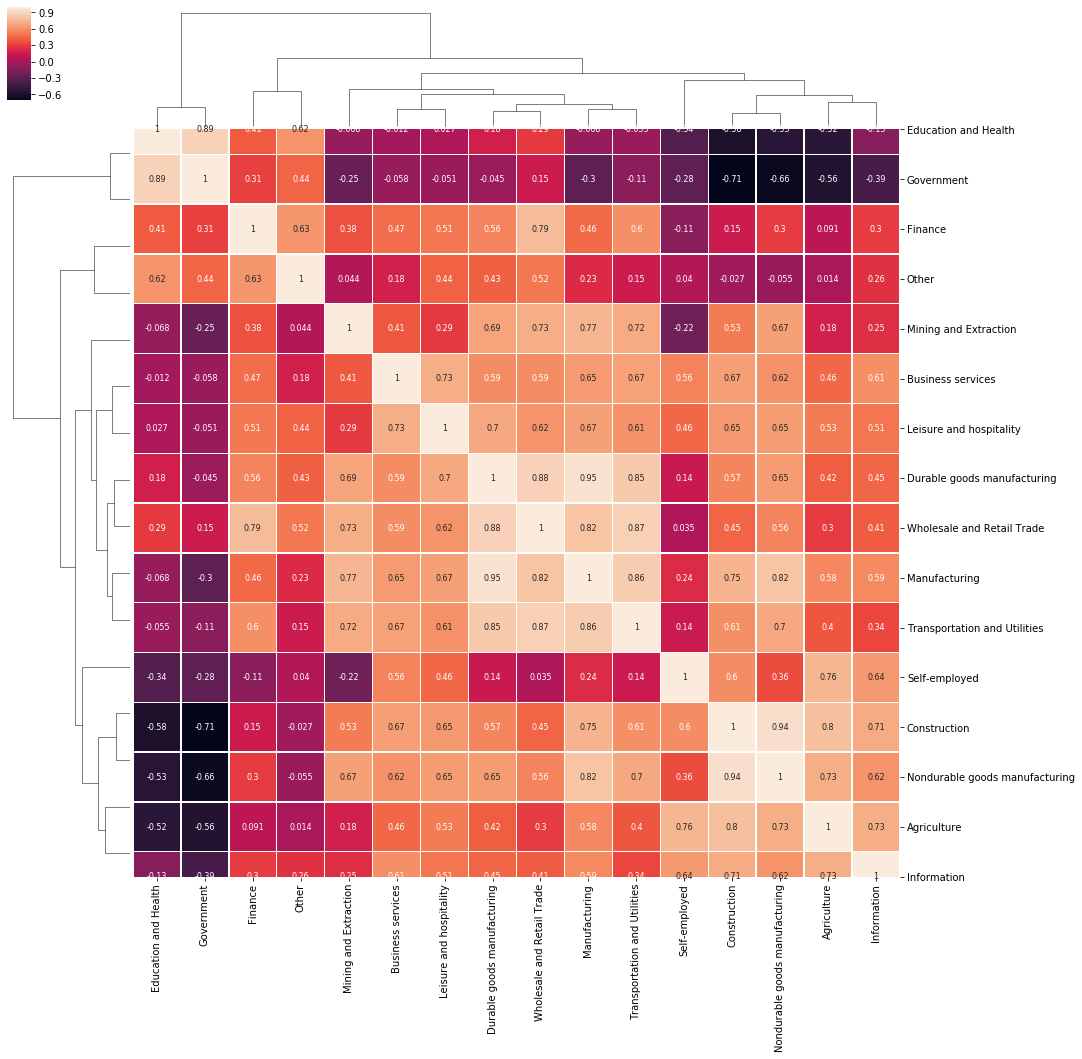

In [48]:
# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 8}, linewidths=.4, figsize=(16, 16))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show();

In [49]:
# Print the correlation between the seasonalities of the Government and Education & Health industries
print(0.888797)

0.888797


## Interpret correlations

The time series in the jobs DataFrame contain multiple time series with very different seasonalities. Using the clustermap of the correlation plots that you generated in the previous exercise, can you identify and discuss which time series is the most correlated to the Self-Employed job? Answer: Agriculture (0.76)